<a href="https://colab.research.google.com/github/himanshutyagi2020/Tensorflow/blob/main/DL_Experimental_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

⭐Solution: Following are the steps coded in this notebook 🔽
1. Download the dataset: Data from Google Drive of dataset was downloaded and extracted. After extraction it was uploaded to BITS Google Drive under /content/gdrive/MyDrive/data1_0.2.csv
2. Import the required libraries
3. Input and output shapes
      - X: features/data (inputs)
      - y: labels (outputs)
4. Check the missing values
5. Visualize the data
6. Split data into train and validation sets
- Models with (70% and 30%) 
- Models with (75% and 25%) 
5. Creating a model
5. Compiling a model
6. Defining a loss function
7. Setting up an optimizer
8. Creating evaluation metrics
9. Fitting a model (getting it to find patterns in our data)
10. Evaluating a model
11. Looking at training curves

♦**Model Design:**
- Sequential API 
- BinaryCrossentropy
- optimizers.SGD 
- optimizers.Adam 
- activation= relu
- activation= sigmoid
- metrics
- learning rate


✍**Conclusion:**Final results: Designed diverese models with at most quality.
Detailed report ⏬ 

- Prepared a notebook using Google Colab on the given dataset.
- Dataset consists of feature 1, feature 2 and class label.
- Using tensorflow.keras library, Trained two single/double hidden layer deep networks by varying the number of hidden nodes (4, 8, 12, 16) in each layer with **70% training and 30% validation data**. Used appropriate learning rate, activation, and loss functions.

⛳**Note:** 
      - model_1: Single layer (4)
      - 



- Provided the detailed summary of each and every model and how the observed accuracy and minimum loss achieved.
- Visually observed the dataset and designed derived feature with **75% training and 25% validation data**. 

⛳**Note:** Results shows that network with 4 hidden layers (16,12,8,4) gives the best results (82% accuracy ) with .
- activation (relu) : Hidden layers
- activation (sigmoid) : Output layers
- losses.binary_crossentropy
- optimizers.Adam
- learning rate : 0.01
- metrics : accuracy




Part 1
1. Load the attached csv file in python. Each row consists of feature 1, feature 2, class label.
 :

2. Train two single/double hidden layer deep networks by varying the number of hidden nodes (4, 8, 12, 16) in each layer with 70% training and 30% validation data. Use appropriate learning rate, activation, and loss functions and also mention the reason for choosing the same. Report, compare, and explain the observed accuracy and minimum loss achieved. [0.5+1 mark]

In [1]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[]


In [3]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [4]:
## Defining the path to the datasets
data_path = "/content/gdrive/MyDrive/data1_0.2.csv"

In [5]:
# Following libraries will be uploaded to process the data and build model. 
import numpy as np
import pandas as pd

In [6]:
# Make dataframe of features and labels (naming column1 as feature 1, column2 as feature 2 and 
#column 3 as target/label)
df = pd.read_csv(data_path,names=['feature1', 'feature2', 'label'])

In [7]:
#check the data shape
df.shape

(765, 3)

In [8]:
# Missing values check
missing_data = df.isna().sum().sort_values(ascending=False)
percentage_missing = round((df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100,2)
missing_info = pd.concat([missing_data,percentage_missing],keys=['Missing values','Percentage'],axis=1)
missing_info.style.background_gradient()

,Missing values,Percentage
label,0,0.000000
feature2,0,0.000000
feature1,0,0.000000


In [9]:
df.head(10)

,feature1,feature2,label
0,0.046000,-0.181767,0
1,-0.516146,0.210068,0
2,0.246368,-0.514901,0
3,-0.176004,0.538347,0
4,-0.540533,0.239300,0
5,-0.493781,-0.339981,0
6,0.505439,0.264136,0
7,0.222880,0.450681,0
8,0.170211,-0.542432,0
9,0.338921,-0.394976,0


In [10]:
df.tail(10)

,feature1,feature2,label
755,-0.279084,0.183850,1
756,-0.033757,0.346703,1
757,-0.258535,0.274430,1
758,0.321809,-0.717153,1
759,-0.154835,0.209121,1
760,0.218472,0.184996,1
761,-0.097992,-0.302559,1
762,-0.236467,0.212870,1
763,0.745290,-0.210026,1
764,0.248667,0.218322,1


In [11]:
df.columns

Index(['feature1', 'feature2', 'label'], dtype='object')

In [12]:
df.describe

<bound method NDFrame.describe of      feature1  feature2  label
0    0.046000 -0.181767      0
1   -0.516146  0.210068      0
2    0.246368 -0.514901      0
3   -0.176004  0.538347      0
4   -0.540533  0.239300      0
..        ...       ...    ...
760  0.218472  0.184996      1
761 -0.097992 -0.302559      1
762 -0.236467  0.212870      1
763  0.745290 -0.210026      1
764  0.248667  0.218322      1

[765 rows x 3 columns]>

In [13]:
df['label'].unique()

array([0, 1])

In [14]:
# Check out the different labels
df.label.value_counts()

0    445
1    320
Name: label, dtype: int64

Alright, looks like we're dealing with a binary classification problem. It's binary because there are only two labels (0 or 1).

If there were more label options (e.g. 0, 1, 2, 3 or 4), it would be called multiclass classification.

Let's take our visualization a step further and plot our data.

In [15]:
X = df[['feature1', 'feature2']]
y = df['label']

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

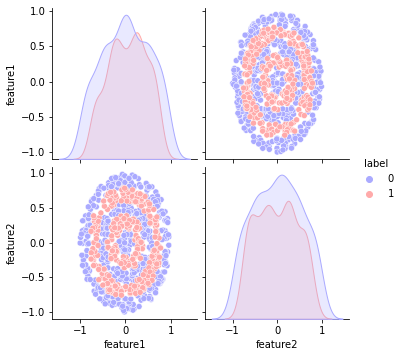

In [17]:
sns.pairplot(df,hue='label',palette='bwr')

In [18]:
# Check the shapes of our features and labels
print(X.shape,y.shape)

(765, 2) (765,)


In [19]:
# Check how many samples we have
print(len(X), len(y))

765 765


In [20]:
## Following libraries will be uploaded to process the data and build model. 
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from keras import models
from keras import layers

In [21]:
# Split data into train and test sets
# 70% of the data for the training set
# 30% of the data for the test set
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [22]:
X_train.shape

(535, 2)

In [23]:
y_train.shape

(535,)

In [24]:
X_test.shape

(230, 2)

In [25]:
y_test.shape

(230,)

In [26]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, 4 neurons, ReLU activation
  tf.keras.layers.Dense(1) # ouput layer
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
history = model_1.fit(X_train, y_train, epochs=20, batch_size=128)

Epoch 1/20
5/5 [==============================] - 1s 3ms/step - loss: 3.6556 - accuracy: 0.4710
Epoch 2/20
5/5 [==============================] - 0s 3ms/step - loss: 1.5669 - accuracy: 0.4280
Epoch 3/20
5/5 [==============================] - 0s 3ms/step - loss: 0.7471 - accuracy: 0.4636
Epoch 4/20
5/5 [==============================] - 0s 3ms/step - loss: 0.7277 - accuracy: 0.4785
Epoch 5/20
5/5 [==============================] - 0s 3ms/step - loss: 0.7160 - accuracy: 0.4766
Epoch 6/20
5/5 [==============================] - 0s 3ms/step - loss: 0.7119 - accuracy: 0.4860
Epoch 7/20
5/5 [==============================] - 0s 3ms/step - loss: 0.7087 - accuracy: 0.4953
Epoch 8/20
5/5 [==============================] - 0s 4ms/step - loss: 0.7068 - accuracy: 0.5103
Epoch 9/20
5/5 [==============================] - 0s 3ms/step - loss: 0.7062 - accuracy: 0.4972
Epoch 10/20
5/5 [==============================] - 0s 5ms/step - loss: 0.7046 - accuracy: 0.5047
Epoch 11/20
5/5 [======================

In [27]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Print
loss, accuracy = model_1.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

8/8 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.5348
Model loss on the test set: 0.6873360872268677
Model accuracy on the test set: 53.48%


Text(0.5, 1.0, 'Model_1 training curves')

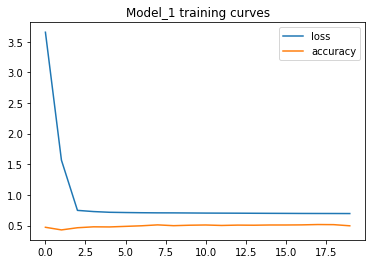

In [29]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_1 training curves")

In [30]:
def getPredictions(x):

  probabilities = model_1.predict(x)

  for i in range(len(probabilities)):
    if probabilities[i] < 0.5:
        probabilities[i] = int(0)
    elif probabilities[i] > 0.5:
        probabilities[i] = int(1)
  return probabilities

y_pred=getPredictions(X_test)

In [31]:
y_pred[15:20]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [32]:
con_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm, index = [0, 1], columns = [0, 1])
con_mat_df

,0,1
0,0.85,0.15
1,0.93,0.07


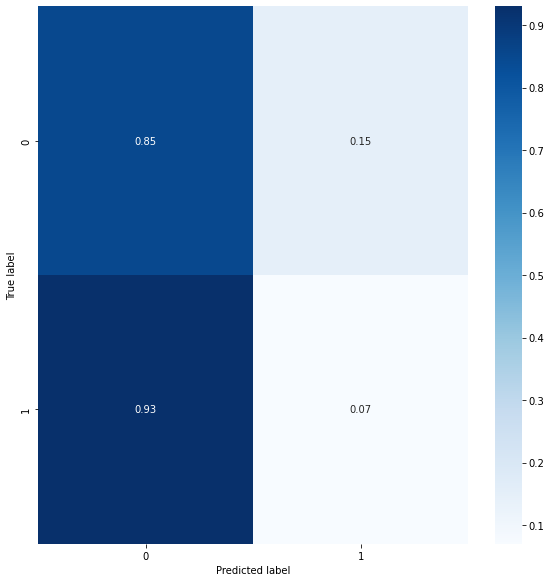

In [33]:
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [34]:
# Print confusion report

from sklearn.metrics import classification_report
target_names = ['Negative', 'Positive']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Negative       0.57      0.85      0.68       136
    Positive       0.26      0.07      0.12        94

    accuracy                           0.53       230
   macro avg       0.42      0.46      0.40       230
weighted avg       0.44      0.53      0.45       230



In [35]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, 4 neurons, ReLU activation
  tf.keras.layers.Dense(8, activation=tf.keras.activations.relu), # hidden layer 2, 8 neurons, ReLU activation
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_2.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001), # Adam's default learning rate is 0.001
                metrics=['accuracy'])

# Fit the model
history = model_2.fit(X_train, y_train, epochs=25, batch_size= 10)

Epoch 1/25


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


54/54 [==============================] - 1s 1ms/step - loss: 0.6766 - accuracy: 0.5720
Epoch 2/25
54/54 [==============================] - 0s 2ms/step - loss: 0.6751 - accuracy: 0.5776
Epoch 3/25
54/54 [==============================] - 0s 1ms/step - loss: 0.6743 - accuracy: 0.5720
Epoch 4/25
54/54 [==============================] - 0s 1ms/step - loss: 0.6736 - accuracy: 0.5738
Epoch 5/25
54/54 [==============================] - 0s 1ms/step - loss: 0.6726 - accuracy: 0.5645
Epoch 6/25
54/54 [==============================] - 0s 2ms/step - loss: 0.6721 - accuracy: 0.5607
Epoch 7/25
54/54 [==============================] - 0s 2ms/step - loss: 0.6714 - accuracy: 0.5626
Epoch 8/25
54/54 [==============================] - 0s 1ms/step - loss: 0.6710 - accuracy: 0.5757
Epoch 9/25
54/54 [==============================] - 0s 1ms/step - loss: 0.6707 - accuracy: 0.5664
Epoch 10/25
54/54 [==============================] - 0s 1ms/step - loss: 0.6697 - accuracy: 0.5626
Epoch 11/25
54/54 [===========

In [36]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 4)                 12        
                                                                 
 dense_3 (Dense)             (None, 8)                 40        
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Evaluate the model
model_2.evaluate(X_test, y_test)

8/8 [==============================] - 0s 2ms/step - loss: 0.6602 - accuracy: 0.5652


[0.6601635217666626, 0.5652173757553101]

In [38]:
# Print
loss, accuracy = model_2.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

8/8 [==============================] - 0s 2ms/step - loss: 0.6602 - accuracy: 0.5652
Model loss on the test set: 0.6601635217666626
Model accuracy on the test set: 56.52%


Text(0.5, 1.0, 'Model_2 training curves')

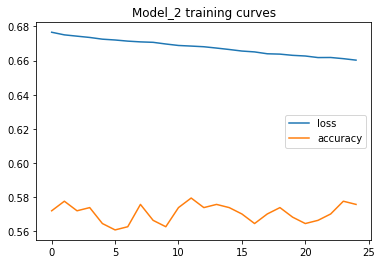

In [39]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_2 training curves")

In [40]:
def getPredictions(x):

  probabilities = model_2.predict(x)

  for i in range(len(probabilities)):
    if probabilities[i] < 0.5:
        probabilities[i] = int(0)
    elif probabilities[i] > 0.5:
        probabilities[i] = int(1)
  return probabilities

y_pred=getPredictions(X_test)

In [41]:
con_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm, index = [0, 1], columns = [0, 1])
con_mat_df

,0,1
0,0.90,0.10
1,0.91,0.09


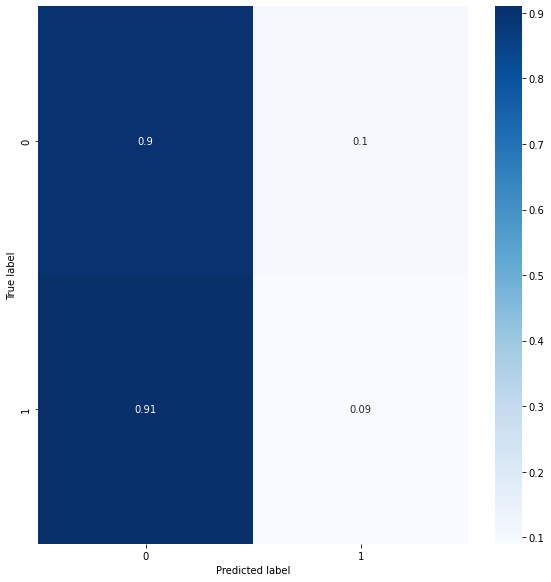

In [42]:
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [43]:
# Print confusion report. 

from sklearn.metrics import classification_report
target_names = ['Negative', 'Positive']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Negative       0.59      0.90      0.71       136
    Positive       0.36      0.09      0.14        94

    accuracy                           0.57       230
   macro avg       0.48      0.49      0.42       230
weighted avg       0.50      0.57      0.48       230



In [44]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(12, activation=tf.keras.activations.relu), # hidden layer 1, 4 neurons, ReLU activation
  tf.keras.layers.Dense(8, activation=tf.keras.activations.relu), # hidden layer 2, 8 neurons, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 3,12 neurons, ReLU activation
  tf.keras.layers.Dense(1) # ouput layer # binary since we are working with 2 clases (0 & 1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001), # Adam's default learning rate is 0.001
                metrics=['accuracy'])

# Fit the model
history = model_3.fit(X_train, y_train, epochs=9,batch_size=512)

Epoch 1/9


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 1s 6ms/step - loss: 1.5305 - accuracy: 0.5776
Epoch 2/9
2/2 [==============================] - 0s 4ms/step - loss: 1.2969 - accuracy: 0.5776
Epoch 3/9
2/2 [==============================] - 0s 6ms/step - loss: 1.2228 - accuracy: 0.5776
Epoch 4/9
2/2 [==============================] - 0s 7ms/step - loss: 1.1694 - accuracy: 0.5776
Epoch 5/9
2/2 [==============================] - 0s 5ms/step - loss: 1.1277 - accuracy: 0.5776
Epoch 6/9
2/2 [==============================] - 0s 6ms/step - loss: 1.0950 - accuracy: 0.5776
Epoch 7/9
2/2 [==============================] - 0s 8ms/step - loss: 1.0669 - accuracy: 0.5776
Epoch 8/9
2/2 [==============================] - 0s 6ms/step - loss: 1.0426 - accuracy: 0.5776
Epoch 9/9
2/2 [==============================] - 0s 5ms/step - loss: 1.0213 - accuracy: 0.5776


In [45]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 12)                36        
                                                                 
 dense_6 (Dense)             (None, 8)                 104       
                                                                 
 dense_7 (Dense)             (None, 4)                 36        
                                                                 
 dense_8 (Dense)             (None, 1)                 5         
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [46]:
# Evaluate the model
model_3.evaluate(X_test, y_test)

8/8 [==============================] - 0s 2ms/step - loss: 0.9755 - accuracy: 0.5913


[0.9755110144615173, 0.591304361820221]

In [47]:
# Print
loss, accuracy = model_3.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

8/8 [==============================] - 0s 2ms/step - loss: 0.9755 - accuracy: 0.5913
Model loss on the test set: 0.9755110144615173
Model accuracy on the test set: 59.13%


Text(0.5, 1.0, 'Model_3 training curves')

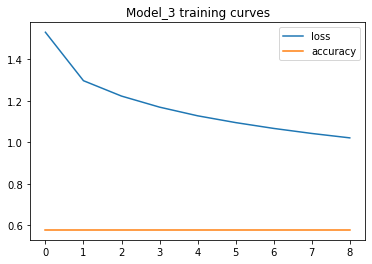

In [48]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_3 training curves")

In [49]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(16, activation=tf.keras.activations.relu), # hidden layer 1, 4 neurons, ReLU activation
  tf.keras.layers.Dense(12, activation=tf.keras.activations.relu), # hidden layer 2, 8 neurons, ReLU activation
  tf.keras.layers.Dense(8, activation=tf.keras.activations.relu), # hidden layer 3,12 neurons, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 4,16 neurons, ReLU activation
  tf.keras.layers.Dense(1) # ouput layer
])

# Compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001), # Adam's default learning rate is 0.001
                metrics=['accuracy'])

# Fit the model
history = model_4.fit(X_train, y_train, epochs=275, batch_size=10)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/275
54/54 [==============================] - 1s 2ms/step - loss: 1.0600 - accuracy: 0.5776
Epoch 2/275
54/54 [==============================] - 0s 2ms/step - loss: 0.7801 - accuracy: 0.5308
Epoch 3/275
54/54 [==============================] - 0s 2ms/step - loss: 0.7283 - accuracy: 0.5327
Epoch 4/275
54/54 [==============================] - 0s 2ms/step - loss: 0.7070 - accuracy: 0.4935
Epoch 5/275
54/54 [==============================] - 0s 2ms/step - loss: 0.6959 - accuracy: 0.5551
Epoch 6/275
54/54 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.5383
Epoch 7/275
54/54 [==============================] - 0s 2ms/step - loss: 0.6819 - accuracy: 0.5664
Epoch 8/275
54/54 [==============================] - 0s 2ms/step - loss: 0.6767 - accuracy: 0.5757
Epoch 9/275
54/54 [==============================] - 0s 2ms/step - loss: 0.6745 - accuracy: 0.5757
Epoch 10/275
54/54 [==============================] - 0s 2ms/step - loss: 0.6714 - accuracy: 0.5776
Epoch 11/

In [50]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 16)                48        
                                                                 
 dense_10 (Dense)            (None, 12)                204       
                                                                 
 dense_11 (Dense)            (None, 8)                 104       
                                                                 
 dense_12 (Dense)            (None, 4)                 36        
                                                                 
 dense_13 (Dense)            (None, 1)                 5         
                                                                 
Total params: 397
Trainable params: 397
Non-trainable params: 0
_________________________________________________________________


In [51]:
# Evaluate the model
model_4.evaluate(X_test, y_test)

8/8 [==============================] - 0s 2ms/step - loss: 0.1373 - accuracy: 0.9304


[0.1373031884431839, 0.9304347634315491]

In [52]:
# Print
loss, accuracy = model_4.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

8/8 [==============================] - 0s 2ms/step - loss: 0.1373 - accuracy: 0.9304
Model loss on the test set: 0.1373031884431839
Model accuracy on the test set: 93.04%


Text(0.5, 1.0, 'Model_4 training curves')

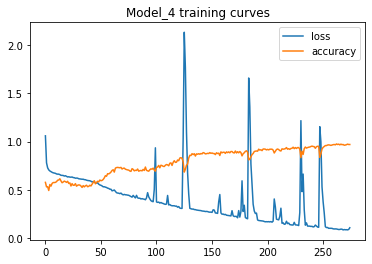

In [53]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_4 training curves")

In [54]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(16, activation="relu"), # hidden layer 1, using "relu" for activation
  tf.keras.layers.Dense(12, activation="relu"),
  tf.keras.layers.Dense(8, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.01), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'])

# Fit the model
history = model_5.fit(X_train, y_train, epochs=275, batch_size=20)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/275
27/27 [==============================] - 1s 2ms/step - loss: 0.6803 - accuracy: 0.5664
Epoch 2/275
27/27 [==============================] - 0s 2ms/step - loss: 0.6735 - accuracy: 0.5776
Epoch 3/275
27/27 [==============================] - 0s 2ms/step - loss: 0.6689 - accuracy: 0.5776
Epoch 4/275
27/27 [==============================] - 0s 2ms/step - loss: 0.6581 - accuracy: 0.5813
Epoch 5/275
27/27 [==============================] - 0s 2ms/step - loss: 0.6478 - accuracy: 0.5664
Epoch 6/275
27/27 [==============================] - 0s 2ms/step - loss: 0.6091 - accuracy: 0.5850
Epoch 7/275
27/27 [==============================] - 0s 2ms/step - loss: 0.5690 - accuracy: 0.6505
Epoch 8/275
27/27 [==============================] - 0s 2ms/step - loss: 0.5267 - accuracy: 0.6860
Epoch 9/275
27/27 [==============================] - 0s 2ms/step - loss: 0.5478 - accuracy: 0.6748
Epoch 10/275
27/27 [==============================] - 0s 2ms/step - loss: 0.5341 - accuracy: 0.6729
Epoch 11/

In [55]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 16)                48        
                                                                 
 dense_15 (Dense)            (None, 12)                204       
                                                                 
 dense_16 (Dense)            (None, 8)                 104       
                                                                 
 dense_17 (Dense)            (None, 4)                 36        
                                                                 
 dense_18 (Dense)            (None, 1)                 5         
                                                                 
Total params: 397
Trainable params: 397
Non-trainable params: 0
_________________________________________________________________


In [56]:
# Evaluate our model on the test set
loss, accuracy = model_5.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

8/8 [==============================] - 0s 3ms/step - loss: 0.5073 - accuracy: 0.6826
Model loss on the test set: 0.5073431134223938
Model accuracy on the test set: 68.26%


Text(0.5, 1.0, 'Model_5 training curves')

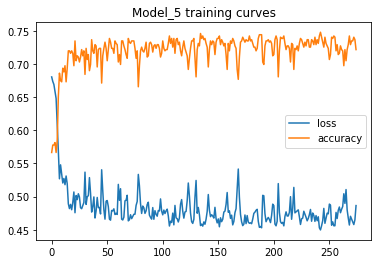

In [57]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_5 training curves")

In [58]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_6 = tf.keras.Sequential([
   tf.keras.layers.Dense(16, activation="relu"), # hidden layer 1, using "relu" for activation
  tf.keras.layers.Dense(12, activation="relu"),
  tf.keras.layers.Dense(8, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_6.compile(loss="binary_crossentropy", 
              optimizer="Adam", 
              metrics=["accuracy"]) 

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit the model (passing the lr_scheduler callback)
history = model_6.fit(X_train, 
                      y_train, 
                      epochs=100,
                      callbacks=[lr_scheduler])

Epoch 1/100
17/17 [==============================] - 1s 5ms/step - loss: 0.6970 - accuracy: 0.4393 - lr: 1.0000e-04
Epoch 2/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6960 - accuracy: 0.4654 - lr: 1.1220e-04
Epoch 3/100
17/17 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.4972 - lr: 1.2589e-04
Epoch 4/100
17/17 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.5178 - lr: 1.4125e-04
Epoch 5/100
17/17 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5364 - lr: 1.5849e-04
Epoch 6/100
17/17 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5495 - lr: 1.7783e-04
Epoch 7/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6900 - accuracy: 0.5589 - lr: 1.9953e-04
Epoch 8/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6886 - accuracy: 0.5720 - lr: 2.2387e-04
Epoch 9/100
17/17 [==============================] - 0s 4ms/step - loss:

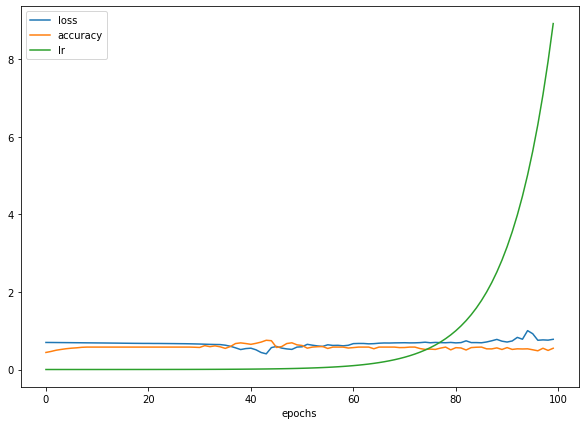

In [59]:
# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs");

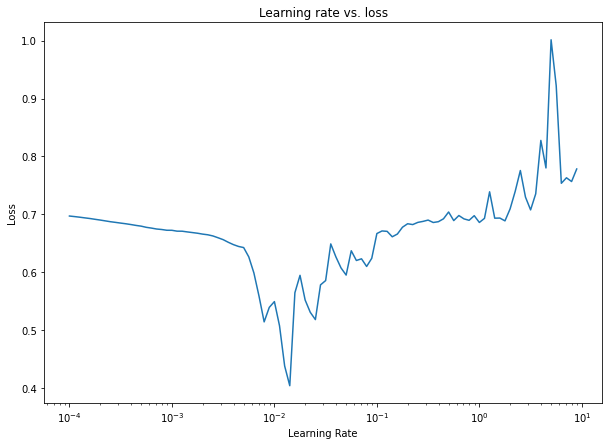

In [60]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [61]:
# Example of other typical learning rate values
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [62]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_7= tf.keras.Sequential([
   tf.keras.layers.Dense(16, activation="relu"), # hidden layer 1, using "relu" for activation
   tf.keras.layers.Dense(12, activation="relu"),
   tf.keras.layers.Dense(8, activation="relu"),
   tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model with the ideal learning rate
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.02), # to adjust the learning rate, we need to use tf.keras.optimizers.Adam (not "adam")
                metrics=["accuracy"])

# Fit the model for 300 epochs
history = model_7.fit(X_train, y_train, epochs=300, batch_size=25)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/300
22/22 [==============================] - 1s 2ms/step - loss: 0.6810 - accuracy: 0.5589
Epoch 2/300
22/22 [==============================] - 0s 2ms/step - loss: 0.6738 - accuracy: 0.5776
Epoch 3/300
22/22 [==============================] - 0s 2ms/step - loss: 0.6695 - accuracy: 0.5776
Epoch 4/300
22/22 [==============================] - 0s 2ms/step - loss: 0.6670 - accuracy: 0.5738
Epoch 5/300
22/22 [==============================] - 0s 2ms/step - loss: 0.6481 - accuracy: 0.6037
Epoch 6/300
22/22 [==============================] - 0s 2ms/step - loss: 0.6238 - accuracy: 0.5757
Epoch 7/300
22/22 [==============================] - 0s 2ms/step - loss: 0.6201 - accuracy: 0.5551
Epoch 8/300
22/22 [==============================] - 0s 2ms/step - loss: 0.6023 - accuracy: 0.6075
Epoch 9/300
22/22 [==============================] - 0s 2ms/step - loss: 0.5983 - accuracy: 0.6299
Epoch 10/300
22/22 [==============================] - 0s 2ms/step - loss: 0.5727 - accuracy: 0.6262
Epoch 11/

In [63]:
# Evaluate model on the test dataset
model_7.evaluate(X_test, y_test)

8/8 [==============================] - 0s 2ms/step - loss: 0.4960 - accuracy: 0.6957


[0.49596911668777466, 0.695652186870575]

In [64]:
# Check the accuracy of our model
loss, accuracy = model_7.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

8/8 [==============================] - 0s 2ms/step - loss: 0.4960 - accuracy: 0.6957
Model loss on test set: 0.49596911668777466
Model accuracy on test set: 69.57%


Text(0.5, 1.0, 'Model_7 training curves')

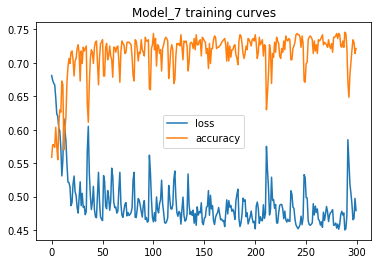

In [65]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_7 training curves")

Part 2
3. Visually observe the dataset and design an appropriate feature transformation (derived feature) such that after feature transformation, the dataset can be classified using a minimal network architecture (minimum number of parameters). Design, train this minimal network, and report training and validation errors, and trained parameters of the network. Use 75% training and 25% validation data, appropriate learning rate, activation and loss functions. Explain the final results. [1+1+0.5 marks]

In [66]:
#check the data shape
df.shape

(765, 3)

In [67]:
print(df)

     feature1  feature2  label
0    0.046000 -0.181767      0
1   -0.516146  0.210068      0
2    0.246368 -0.514901      0
3   -0.176004  0.538347      0
4   -0.540533  0.239300      0
..        ...       ...    ...
760  0.218472  0.184996      1
761 -0.097992 -0.302559      1
762 -0.236467  0.212870      1
763  0.745290 -0.210026      1
764  0.248667  0.218322      1

[765 rows x 3 columns]


In [68]:
df.head(10)

,feature1,feature2,label
0,0.046000,-0.181767,0
1,-0.516146,0.210068,0
2,0.246368,-0.514901,0
3,-0.176004,0.538347,0
4,-0.540533,0.239300,0
5,-0.493781,-0.339981,0
6,0.505439,0.264136,0
7,0.222880,0.450681,0
8,0.170211,-0.542432,0
9,0.338921,-0.394976,0


In [69]:
df.tail(10)

,feature1,feature2,label
755,-0.279084,0.183850,1
756,-0.033757,0.346703,1
757,-0.258535,0.274430,1
758,0.321809,-0.717153,1
759,-0.154835,0.209121,1
760,0.218472,0.184996,1
761,-0.097992,-0.302559,1
762,-0.236467,0.212870,1
763,0.745290,-0.210026,1
764,0.248667,0.218322,1


In [70]:
X = df[['feature1', 'feature2']]
y = df['label']

In [71]:
# check only features 
print(X)

     feature1  feature2
0    0.046000 -0.181767
1   -0.516146  0.210068
2    0.246368 -0.514901
3   -0.176004  0.538347
4   -0.540533  0.239300
..        ...       ...
760  0.218472  0.184996
761 -0.097992 -0.302559
762 -0.236467  0.212870
763  0.745290 -0.210026
764  0.248667  0.218322

[765 rows x 2 columns]


In [72]:
# check label
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
760    1
761    1
762    1
763    1
764    1
Name: label, Length: 765, dtype: int64


In [73]:
# Missing values check
missing_data = df.isna().sum().sort_values(ascending=False)
percentage_missing = round((df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100,2)
missing_info = pd.concat([missing_data,percentage_missing],keys=['Missing values','Percentage'],axis=1)
missing_info.style.background_gradient()

,Missing values,Percentage
label,0,0.000000
feature2,0,0.000000
feature1,0,0.000000


In [74]:
df.columns

Index(['feature1', 'feature2', 'label'], dtype='object')

In [75]:
df.describe

<bound method NDFrame.describe of      feature1  feature2  label
0    0.046000 -0.181767      0
1   -0.516146  0.210068      0
2    0.246368 -0.514901      0
3   -0.176004  0.538347      0
4   -0.540533  0.239300      0
..        ...       ...    ...
760  0.218472  0.184996      1
761 -0.097992 -0.302559      1
762 -0.236467  0.212870      1
763  0.745290 -0.210026      1
764  0.248667  0.218322      1

[765 rows x 3 columns]>

In [76]:
df['label'].unique()

array([0, 1])

In [77]:
# Check out the different labels
df.label.value_counts()

0    445
1    320
Name: label, dtype: int64

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

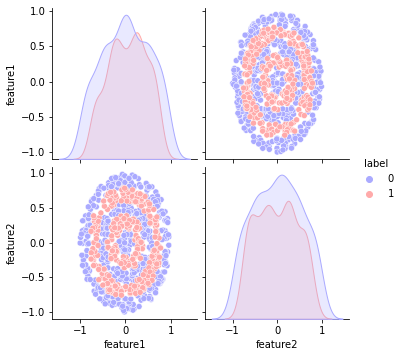

In [79]:
sns.pairplot(df,hue='label',palette='bwr')

In [80]:
# Check how many samples we have
print(len(X), len(y))

765 765


In [81]:
# Split data into train and test sets
# 75% of the data for the training set
# 25% of the data for the validation set
from sklearn.model_selection import train_test_split
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, test_size=0.25, random_state=42)

In [82]:
(765*0.25)

191.25

In [83]:
765-192

573

In [84]:
# check 75% of features
print(X_train_3)

     feature1  feature2
395  0.422118  0.114086
132  0.382569  0.347668
702 -0.026098 -0.362983
691  0.238963  0.087569
716  0.732473 -0.294135
..        ...       ...
71   0.019536 -0.590529
106 -0.093597 -0.496273
270  0.426609 -0.211310
435 -0.551417 -0.649543
102  0.198639 -0.017705

[573 rows x 2 columns]


In [85]:
# check 75% label
print(y_train_3)

395    0
132    0
702    1
691    1
716    1
      ..
71     0
106    0
270    0
435    0
102    0
Name: label, Length: 573, dtype: int64


In [86]:
# check 25% - features and lable
print (X_test_3, y_test_3)

     feature1  feature2
357 -0.527696 -0.669628
259  0.360320 -0.197215
751  0.159286 -0.240428
193  0.169593 -0.892116
333 -0.801336 -0.007525
..        ...       ...
73  -0.405368  0.347689
745  0.039989  0.267441
300  0.799527  0.453894
145  0.953268  0.085023
264  0.783346 -0.268301

[192 rows x 2 columns] 357    0
259    0
751    1
193    0
333    0
      ..
73     0
745    1
300    0
145    0
264    0
Name: label, Length: 192, dtype: int64


In [87]:
# standarization: We use the Standardscaler from sklearn library
from sklearn.preprocessing import StandardScaler

In [88]:
scaler=StandardScaler()
# fit_transform
X_train_scaled=scaler.fit_transform(X_train_3)

In [89]:
print(X_train_scaled)

[[ 0.82639493  0.22445916]
 [ 0.74424399  0.69054447]
 [-0.10464086 -0.72747193]
 ...
 [ 0.83572518 -0.42482787]
 [-1.19583464 -1.29926729]
 [ 0.36218486 -0.03851205]]


In [90]:
X_test_scaled=scaler.transform(X_test_3)

In [91]:
print(X_test_scaled)

[[-1.14656087 -1.33934433]
 [ 0.69802789 -0.39670213]
 [ 0.28044064 -0.48292857]
 [ 0.30184935 -1.78329146]
 [-1.71496632 -0.0182001 ]
 [ 0.36493107  1.17657716]
 [-0.16369663  1.41396499]
 [ 0.17260212  0.89447985]
 [ 0.76024751  0.81806696]
 [-1.48192841 -1.39875623]
 [-1.8532342  -0.38803798]
 [ 0.67171021 -1.4496228 ]
 [ 1.48019615 -1.11414626]
 [-0.90479274 -1.51376844]
 [-0.85000881  0.22934095]
 [-0.04427224 -0.18683727]
 [ 1.74704321  0.11805618]
 [ 1.27606284 -0.20258622]
 [ 1.10327103  0.54960041]
 [ 1.1436582   0.70234486]
 [ 1.79942246 -0.37715803]
 [ 0.53142586 -0.00358953]
 [ 0.08752449 -0.59779012]
 [ 1.55102852 -0.15866882]
 [-1.1141005  -1.02068699]
 [-1.27841207  1.21796588]
 [ 0.77550486  0.61837296]
 [-1.52927446 -0.45317949]
 [-0.16097422 -0.25516514]
 [-1.60715581  1.18176313]
 [ 0.20846899  0.99132533]
 [-0.06218622 -0.18577339]
 [-0.80490445 -0.95906851]
 [-0.1709964  -1.32665487]
 [-0.25397889 -0.60690331]
 [-1.3029385  -0.08639012]
 [-0.68760109 -1.30038851]
 

**Using a minimal network architecture**

In [92]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_15 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_15.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.01), # learning rate 0.001 
                metrics=['accuracy'])

# Fit the model
history = model_15.fit(X_train_3, y_train_3, epochs=275, batch_size=10)

Epoch 1/275


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


58/58 [==============================] - 1s 1ms/step - loss: 0.6919 - accuracy: 0.5201
Epoch 2/275
58/58 [==============================] - 0s 1ms/step - loss: 0.6839 - accuracy: 0.5724
Epoch 3/275
58/58 [==============================] - 0s 1ms/step - loss: 0.6828 - accuracy: 0.5724
Epoch 4/275
58/58 [==============================] - 0s 1ms/step - loss: 0.6812 - accuracy: 0.5724
Epoch 5/275
58/58 [==============================] - 0s 2ms/step - loss: 0.6806 - accuracy: 0.5724
Epoch 6/275
58/58 [==============================] - 0s 2ms/step - loss: 0.6769 - accuracy: 0.5724
Epoch 7/275
58/58 [==============================] - 0s 1ms/step - loss: 0.6752 - accuracy: 0.5724
Epoch 8/275
58/58 [==============================] - 0s 1ms/step - loss: 0.6717 - accuracy: 0.5724
Epoch 9/275
58/58 [==============================] - 0s 1ms/step - loss: 0.6731 - accuracy: 0.5777
Epoch 10/275
58/58 [==============================] - 0s 2ms/step - loss: 0.6687 - accuracy: 0.5724
Epoch 11/275
58/58 [=

In [93]:
model_15.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 4)                 12        
                                                                 
 dense_30 (Dense)            (None, 1)                 5         
                                                                 
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [94]:
# Evaluate our model on the test set
loss, accuracy = model_15.evaluate(X_test_3, y_test_3)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

6/6 [==============================] - 0s 2ms/step - loss: 0.5765 - accuracy: 0.6615
Model loss on the test set: 0.5765433311462402
Model accuracy on the test set: 66.15%


Text(0.5, 1.0, 'Model_15 training curves')

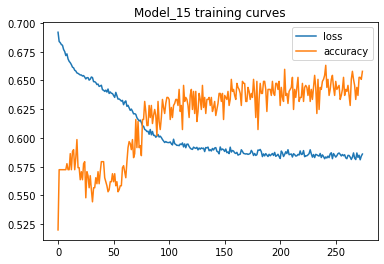

In [95]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_15 training curves")

In [96]:
def getPredictions(x):

  probabilities = model_15.predict(x)

  for i in range(len(probabilities)):
    if probabilities[i] < 0.5:
        probabilities[i] = int(0)
    elif probabilities[i] > 0.5:
        probabilities[i] = int(1)
  return probabilities

y_pred=getPredictions(X_test_3)

In [97]:
con_mat = tf.math.confusion_matrix(labels=y_test_3, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm, index = [0, 1], columns = [0, 1])
con_mat_df

,0,1
0,0.68,0.32
1,0.37,0.63


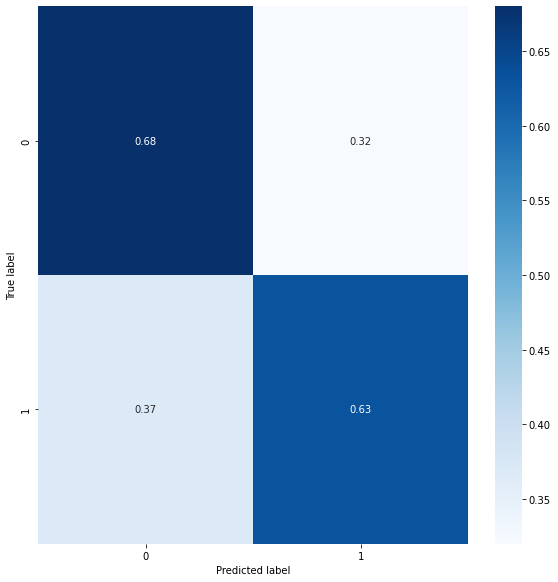

In [98]:
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [99]:
# Print confusion report. 

from sklearn.metrics import classification_report
target_names = ['Negative', 'Positive']
print(classification_report(y_test_3, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Negative       0.74      0.68      0.71       117
    Positive       0.56      0.63      0.59        75

    accuracy                           0.66       192
   macro avg       0.65      0.66      0.65       192
weighted avg       0.67      0.66      0.66       192



In [100]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(16, activation=tf.keras.activations.relu), # hidden layer 1, 16 neurons, ReLU activation
  tf.keras.layers.Dense(12, activation=tf.keras.activations.relu), # hidden layer 2, 12 neurons, ReLU activation
  tf.keras.layers.Dense(8, activation=tf.keras.activations.relu), # hidden layer 3,8 neurons, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1,4 neurons, ReLU activation
  tf.keras.layers.Dense(1) # ouput layer
])

# Compile the model
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001), # Adam's default learning rate is 0.001
                metrics=['accuracy'])

# Fit the model
history = model_8.fit(X_train_3, y_train_3, epochs=110, batch_size=10)

Epoch 1/110


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


58/58 [==============================] - 1s 2ms/step - loss: 1.2142 - accuracy: 0.5707
Epoch 2/110
58/58 [==============================] - 0s 2ms/step - loss: 0.7653 - accuracy: 0.5236
Epoch 3/110
58/58 [==============================] - 0s 2ms/step - loss: 0.7242 - accuracy: 0.5166
Epoch 4/110
58/58 [==============================] - 0s 2ms/step - loss: 0.7056 - accuracy: 0.4991
Epoch 5/110
58/58 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.5323
Epoch 6/110
58/58 [==============================] - 0s 2ms/step - loss: 0.6882 - accuracy: 0.5620
Epoch 7/110
58/58 [==============================] - 0s 2ms/step - loss: 0.6833 - accuracy: 0.5620
Epoch 8/110
58/58 [==============================] - 0s 2ms/step - loss: 0.6752 - accuracy: 0.5724
Epoch 9/110
58/58 [==============================] - 0s 2ms/step - loss: 0.6742 - accuracy: 0.5742
Epoch 10/110
58/58 [==============================] - 0s 2ms/step - loss: 0.6689 - accuracy: 0.5689
Epoch 11/110
58/58 [=

In [101]:
model_8.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 16)                48        
                                                                 
 dense_32 (Dense)            (None, 12)                204       
                                                                 
 dense_33 (Dense)            (None, 8)                 104       
                                                                 
 dense_34 (Dense)            (None, 4)                 36        
                                                                 
 dense_35 (Dense)            (None, 1)                 5         
                                                                 
Total params: 397
Trainable params: 397
Non-trainable params: 0
_________________________________________________________________


In [102]:
# Evaluate the model
model_8.evaluate(X_test_3, y_test_3)

6/6 [==============================] - 0s 2ms/step - loss: 0.4238 - accuracy: 0.7083


[0.4238017499446869, 0.7083333134651184]

In [103]:
# Print
loss, accuracy = model_8.evaluate(X_test_3, y_test_3)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

6/6 [==============================] - 0s 2ms/step - loss: 0.4238 - accuracy: 0.7083
Model loss on the test set: 0.4238017499446869
Model accuracy on the test set: 70.83%


Text(0.5, 1.0, 'Model_8 training curves')

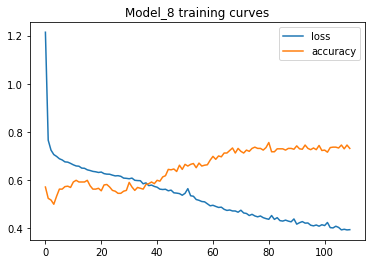

In [104]:
 #Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 training curves")

In [105]:
def getPredictions(x):

  probabilities = model_8.predict(x)

  for i in range(len(probabilities)):
    if probabilities[i] < 0.5:
        probabilities[i] = int(0)
    elif probabilities[i] > 0.5:
        probabilities[i] = int(1)
  return probabilities

y_pred=getPredictions(X_test_3)


In [106]:
print(y_pred)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.

In [107]:
print(y_test_3)

357    0
259    0
751    1
193    0
333    0
      ..
73     0
745    1
300    0
145    0
264    0
Name: label, Length: 192, dtype: int64


In [108]:
y_pred.shape

(192, 1)

In [109]:
con_mat = tf.math.confusion_matrix(labels=y_test_3, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm, index = [0, 1], columns = [0, 1])
con_mat_df

,0,1
0,0.69,0.31
1,0.27,0.73


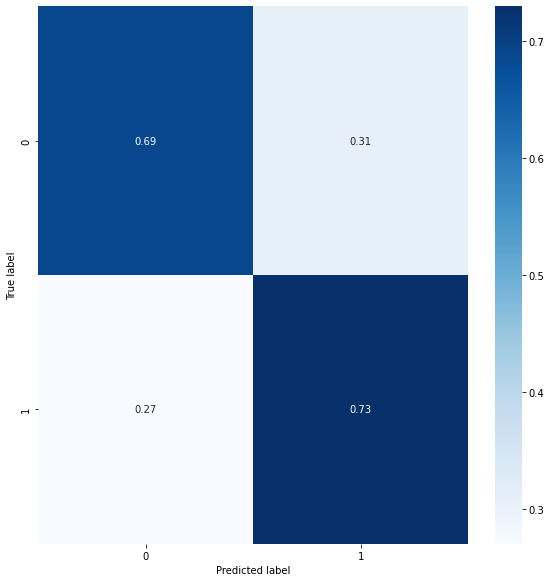

In [110]:
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [111]:
# Print confusion report. 

from sklearn.metrics import classification_report
target_names = ['Negative', 'Positive']
print(classification_report(y_test_3, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Negative       0.80      0.69      0.74       117
    Positive       0.60      0.73      0.66        75

    accuracy                           0.71       192
   macro avg       0.70      0.71      0.70       192
weighted avg       0.72      0.71      0.71       192



In [112]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(16, activation="relu"), # hidden layer 1, using "relu" for activation
  tf.keras.layers.Dense(12, activation="relu"),
  tf.keras.layers.Dense(8, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_9.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.01), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'])

# Fit the model
history = model_9.fit(X_train_3, y_train_3, epochs=275, batch_size=10)

Epoch 1/275


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


58/58 [==============================] - 1s 2ms/step - loss: 0.6842 - accuracy: 0.5620
Epoch 2/275
58/58 [==============================] - 0s 2ms/step - loss: 0.6753 - accuracy: 0.5724
Epoch 3/275
58/58 [==============================] - 0s 2ms/step - loss: 0.6712 - accuracy: 0.5724
Epoch 4/275
58/58 [==============================] - 0s 2ms/step - loss: 0.6759 - accuracy: 0.5812
Epoch 5/275
58/58 [==============================] - 0s 2ms/step - loss: 0.6433 - accuracy: 0.5654
Epoch 6/275
58/58 [==============================] - 0s 2ms/step - loss: 0.6184 - accuracy: 0.5724
Epoch 7/275
58/58 [==============================] - 0s 2ms/step - loss: 0.5786 - accuracy: 0.6457
Epoch 8/275
58/58 [==============================] - 0s 2ms/step - loss: 0.5538 - accuracy: 0.6719
Epoch 9/275
58/58 [==============================] - 0s 2ms/step - loss: 0.4896 - accuracy: 0.7033
Epoch 10/275
58/58 [==============================] - 0s 2ms/step - loss: 0.4807 - accuracy: 0.6876
Epoch 11/275
58/58 [=

In [113]:
model_9.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 16)                48        
                                                                 
 dense_37 (Dense)            (None, 12)                204       
                                                                 
 dense_38 (Dense)            (None, 8)                 104       
                                                                 
 dense_39 (Dense)            (None, 4)                 36        
                                                                 
 dense_40 (Dense)            (None, 1)                 5         
                                                                 
Total params: 397
Trainable params: 397
Non-trainable params: 0
_________________________________________________________________


In [114]:
# Evaluate our model on the test set
loss, accuracy = model_9.evaluate(X_test_3, y_test_3)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

6/6 [==============================] - 0s 2ms/step - loss: 0.4104 - accuracy: 0.7865
Model loss on the test set: 0.4104149341583252
Model accuracy on the test set: 78.65%


Text(0.5, 1.0, 'Model_9 training curves')

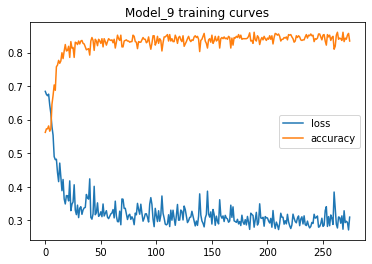

In [115]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_9 training curves")

In [116]:
def getPredictions(x):

  probabilities = model_9.predict(x)

  for i in range(len(probabilities)):
    if probabilities[i] < 0.5:
        probabilities[i] = int(0)
    elif probabilities[i] > 0.5:
        probabilities[i] = int(1)
  return probabilities

y_pred1=getPredictions(X_test_3)

In [117]:
y_pred[:10]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.]], dtype=float32)

In [118]:
y_test_3[:10]

357    0
259    0
751    1
193    0
333    0
586    1
618    1
137    0
67     0
220    0
Name: label, dtype: int64

In [119]:
con_mat1 = tf.math.confusion_matrix(labels=y_test_3, predictions=y_pred).numpy()
con_mat_norm1 = np.around(con_mat1.astype('float') / con_mat1.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df1 = pd.DataFrame(con_mat_norm1, index = [0, 1], columns = [0, 1])
con_mat_df1

,0,1
0,0.69,0.31
1,0.27,0.73


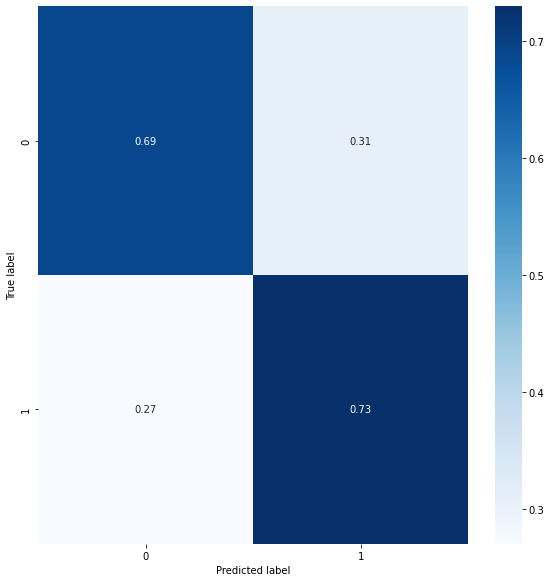

In [120]:
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [121]:
# Print confusion report. 

from sklearn.metrics import classification_report
target_names = ['Negative', 'Positive']
print(classification_report(y_test_3, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Negative       0.80      0.69      0.74       117
    Positive       0.60      0.73      0.66        75

    accuracy                           0.71       192
   macro avg       0.70      0.71      0.70       192
weighted avg       0.72      0.71      0.71       192



In [122]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(8, activation="relu"), # hidden layer 1, using "relu" for activation
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_10.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.01), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'])

# Fit the model
history = model_10.fit(X_train_3, y_train_3, epochs=265, batch_size=10)

Epoch 1/265


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


58/58 [==============================] - 1s 1ms/step - loss: 0.7003 - accuracy: 0.4974
Epoch 2/265
58/58 [==============================] - 0s 1ms/step - loss: 0.6805 - accuracy: 0.5724
Epoch 3/265
58/58 [==============================] - 0s 2ms/step - loss: 0.6788 - accuracy: 0.5724
Epoch 4/265
58/58 [==============================] - 0s 1ms/step - loss: 0.6769 - accuracy: 0.5724
Epoch 5/265
58/58 [==============================] - 0s 1ms/step - loss: 0.6759 - accuracy: 0.5724
Epoch 6/265
58/58 [==============================] - 0s 2ms/step - loss: 0.6725 - accuracy: 0.5724
Epoch 7/265
58/58 [==============================] - 0s 2ms/step - loss: 0.6713 - accuracy: 0.5724
Epoch 8/265
58/58 [==============================] - 0s 1ms/step - loss: 0.6693 - accuracy: 0.5724
Epoch 9/265
58/58 [==============================] - 0s 2ms/step - loss: 0.6688 - accuracy: 0.5567
Epoch 10/265
58/58 [==============================] - 0s 1ms/step - loss: 0.6647 - accuracy: 0.5393
Epoch 11/265
58/58 [=

In [123]:
model_10.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 8)                 24        
                                                                 
 dense_42 (Dense)            (None, 1)                 9         
                                                                 
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [124]:
# Evaluate our model on the test set
loss, accuracy = model_10.evaluate(X_test_3, y_test_3)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

6/6 [==============================] - 0s 3ms/step - loss: 0.5473 - accuracy: 0.6458
Model loss on the test set: 0.5472849011421204
Model accuracy on the test set: 64.58%


Text(0.5, 1.0, 'Model_10 training curves')

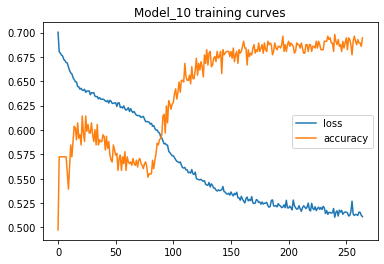

In [125]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_10 training curves")

In [126]:

def getPredictions(x):

  probabilities = model_10.predict(x)

  for i in range(len(probabilities)):
    if probabilities[i] < 0.5:
        probabilities[i] = int(0)
    elif probabilities[i] > 0.5:
        probabilities[i] = int(1)
  return probabilities

y_pred=getPredictions(X_test_3)


In [127]:
con_mat = tf.math.confusion_matrix(labels=y_test_3, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm, index = [0, 1], columns = [0, 1])
con_mat_df

,0,1
0,0.50,0.50
1,0.12,0.88


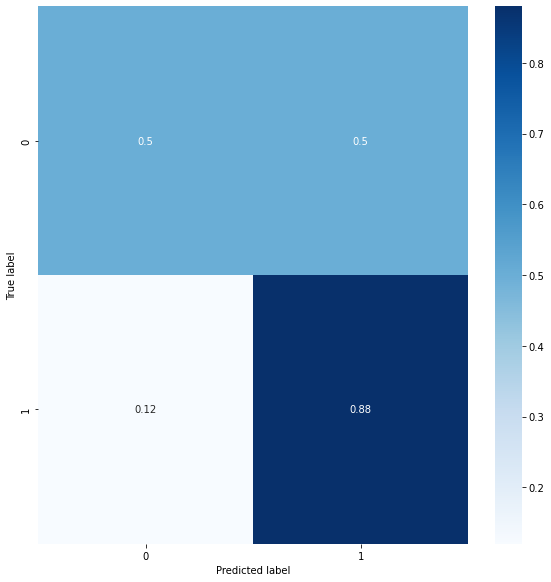

In [128]:
igure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [129]:
# Print confusion report. 

from sklearn.metrics import classification_report
target_names = ['Negative', 'Positive']
print(classification_report(y_test_3, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Negative       0.87      0.50      0.63       117
    Positive       0.53      0.88      0.66        75

    accuracy                           0.65       192
   macro avg       0.70      0.69      0.65       192
weighted avg       0.73      0.65      0.64       192



In [130]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Dense(12, activation="relu"), # hidden layer 1, using "relu" for activation
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_11.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.01), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'])

# Fit the model
history = model_11.fit(X_train_3, y_train_3, epochs=265, batch_size=10)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/265
58/58 [==============================] - 2s 4ms/step - loss: 0.6886 - accuracy: 0.5445
Epoch 2/265
58/58 [==============================] - 0s 3ms/step - loss: 0.6762 - accuracy: 0.5724
Epoch 3/265
58/58 [==============================] - 0s 4ms/step - loss: 0.6748 - accuracy: 0.5724
Epoch 4/265
58/58 [==============================] - 0s 3ms/step - loss: 0.6721 - accuracy: 0.5724
Epoch 5/265
58/58 [==============================] - 0s 2ms/step - loss: 0.6707 - accuracy: 0.5724
Epoch 6/265
58/58 [==============================] - 0s 2ms/step - loss: 0.6657 - accuracy: 0.5654
Epoch 7/265
58/58 [==============================] - 0s 3ms/step - loss: 0.6649 - accuracy: 0.5672
Epoch 8/265
58/58 [==============================] - 0s 3ms/step - loss: 0.6600 - accuracy: 0.5724
Epoch 9/265
58/58 [==============================] - 0s 3ms/step - loss: 0.6617 - accuracy: 0.5864
Epoch 10/265
58/58 [==============================] - 0s 3ms/step - loss: 0.6561 - accuracy: 0.5934
Epoch 11/

In [131]:
model_11.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 12)                36        
                                                                 
 dense_44 (Dense)            (None, 1)                 13        
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [132]:
# Evaluate our model on the test set
loss, accuracy = model_11.evaluate(X_test_3, y_test_3)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

6/6 [==============================] - 0s 3ms/step - loss: 0.5447 - accuracy: 0.6354
Model loss on the test set: 0.5446912050247192
Model accuracy on the test set: 63.54%


Text(0.5, 1.0, 'Model_11 training curves')

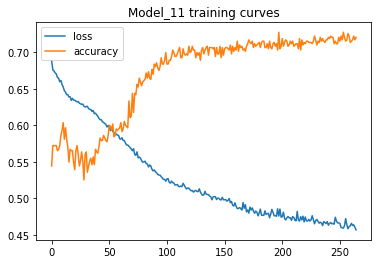

In [133]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_11 training curves")

In [134]:
def getPredictions1(x):

  probabilities = model_11.predict(x)

  for i in range(len(probabilities)):
    if probabilities[i] < 0.5:
        probabilities[i] = int(0)
    elif probabilities[i] > 0.5:
        probabilities[i] = int(1)
  return probabilities

y_pred_11=getPredictions1(X_test_3)


In [135]:
con_mat = tf.math.confusion_matrix(labels=y_test_3, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm, index = [0, 1], columns = [0, 1])
con_mat_df

,0,1
0,0.50,0.50
1,0.12,0.88


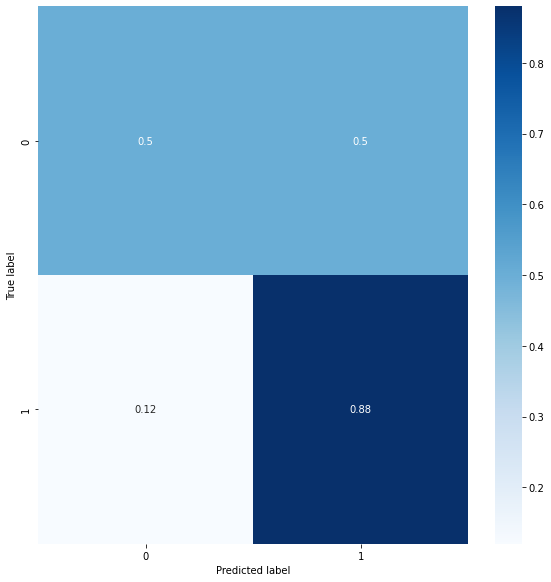

In [136]:
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [137]:
# Print confusion report. 

from sklearn.metrics import classification_report
target_names = ['Negative', 'Positive']
print(classification_report(y_test_3, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Negative       0.87      0.50      0.63       117
    Positive       0.53      0.88      0.66        75

    accuracy                           0.65       192
   macro avg       0.70      0.69      0.65       192
weighted avg       0.73      0.65      0.64       192



In [138]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Dense(16, activation="relu"), # hidden layer 1, using "relu" for activation
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_12.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.01), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'])

# Fit the model
history = model_12.fit(X_train_3, y_train_3, epochs=265, batch_size=10)

Epoch 1/265


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


58/58 [==============================] - 1s 1ms/step - loss: 0.6896 - accuracy: 0.5480
Epoch 2/265
58/58 [==============================] - 0s 1ms/step - loss: 0.6779 - accuracy: 0.5724
Epoch 3/265
58/58 [==============================] - 0s 1ms/step - loss: 0.6759 - accuracy: 0.5724
Epoch 4/265
58/58 [==============================] - 0s 1ms/step - loss: 0.6721 - accuracy: 0.5724
Epoch 5/265
58/58 [==============================] - 0s 2ms/step - loss: 0.6703 - accuracy: 0.5724
Epoch 6/265
58/58 [==============================] - 0s 2ms/step - loss: 0.6631 - accuracy: 0.5724
Epoch 7/265
58/58 [==============================] - 0s 2ms/step - loss: 0.6605 - accuracy: 0.5777
Epoch 8/265
58/58 [==============================] - 0s 1ms/step - loss: 0.6548 - accuracy: 0.5724
Epoch 9/265
58/58 [==============================] - 0s 1ms/step - loss: 0.6559 - accuracy: 0.5881
Epoch 10/265
58/58 [==============================] - 0s 1ms/step - loss: 0.6517 - accuracy: 0.5916
Epoch 11/265
58/58 [=

In [139]:
model_12.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 16)                48        
                                                                 
 dense_46 (Dense)            (None, 1)                 17        
                                                                 
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


In [140]:
# Evaluate our model on the test set
loss, accuracy = model_12.evaluate(X_test_3, y_test_3)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

6/6 [==============================] - 0s 2ms/step - loss: 0.4947 - accuracy: 0.6615
Model loss on the test set: 0.49473559856414795
Model accuracy on the test set: 66.15%


Text(0.5, 1.0, 'Model_12 training curves')

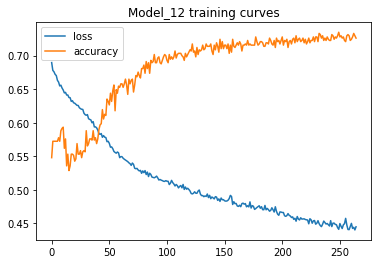

In [141]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_12 training curves")

In [142]:
def getPredictions(x):

  probabilities = model_12.predict(x)

  for i in range(len(probabilities)):
    if probabilities[i] < 0.5:
        probabilities[i] = int(0)
    elif probabilities[i] > 0.5:
        probabilities[i] = int(1)
  return probabilities

y_pred=getPredictions(X_test_3)




In [143]:
con_mat2 = tf.math.confusion_matrix(labels=y_test_3, predictions=y_pred).numpy()
con_mat_norm2 = np.around(con_mat2.astype('float') / con_mat2.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df2 = pd.DataFrame(con_mat_norm2, index = [0, 1], columns = [0, 1])
con_mat_df2


,0,1
0,0.50,0.50
1,0.08,0.92


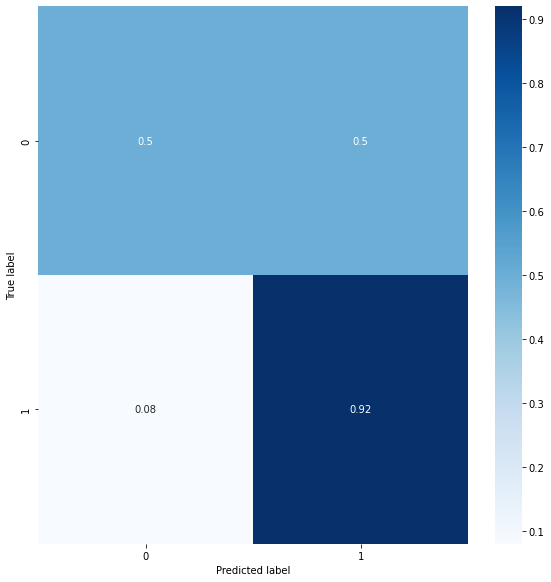

In [144]:
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df2, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [145]:
# Print confusion report. 
from sklearn.metrics import classification_report
target_names = ['Negative', 'Positive']
print(classification_report(y_test_3, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Negative       0.91      0.50      0.64       117
    Positive       0.54      0.92      0.68        75

    accuracy                           0.66       192
   macro avg       0.72      0.71      0.66       192
weighted avg       0.76      0.66      0.66       192



In [185]:
#assign dataframe for feature engineering 
df1=df

In [186]:
df.head()

,feature1,feature2,label
0,0.046000,-0.181767,0
1,-0.516146,0.210068,0
2,0.246368,-0.514901,0
3,-0.176004,0.538347,0
4,-0.540533,0.239300,0


In [187]:
df1.head()

,feature1,feature2,label
0,0.046000,-0.181767,0
1,-0.516146,0.210068,0
2,0.246368,-0.514901,0
3,-0.176004,0.538347,0
4,-0.540533,0.239300,0


In [188]:
# Feature 2 is dropped. 
df1 = df1.drop(['feature2'], axis=1)

In [189]:
df.head()

,feature1,feature2,label
0,0.046000,-0.181767,0
1,-0.516146,0.210068,0
2,0.246368,-0.514901,0
3,-0.176004,0.538347,0
4,-0.540533,0.239300,0


In [190]:
df1.head()

,feature1,label
0,0.046000,0
1,-0.516146,0
2,0.246368,0
3,-0.176004,0
4,-0.540533,0


In [191]:
X_df1 = df1['feature1']
y_df1 = df1['label']

In [192]:
df2=df

In [193]:
df2.head()

,feature1,feature2,label
0,0.046000,-0.181767,0
1,-0.516146,0.210068,0
2,0.246368,-0.514901,0
3,-0.176004,0.538347,0
4,-0.540533,0.239300,0


In [194]:
# Feature 1 is dropped. 
df2 = df2.drop(['feature1'], axis=1)

In [195]:
df2.head()

,feature2,label
0,-0.181767,0
1,0.210068,0
2,-0.514901,0
3,0.538347,0
4,0.239300,0


In [196]:
X_df2 = df2['feature2']
y_df2 = df2['label']

In [170]:
# Split data into train and test sets
# 75% of the data for the training set
# 25% of the data for the validation set
from sklearn.model_selection import train_test_split
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_df1, y_df1, test_size=0.25, random_state=42)

In [171]:
# check 75% of features
print(X_train_4, y_train_4)

395    0.422118
132    0.382569
702   -0.026098
691    0.238963
716    0.732473
         ...   
71     0.019536
106   -0.093597
270    0.426609
435   -0.551417
102    0.198639
Name: feature1, Length: 573, dtype: float64


In [172]:
# check 25% - features and lable
print (X_test_4, y_test_4)

357   -0.527696
259    0.360320
751    0.159286
193    0.169593
333   -0.801336
         ...   
73    -0.405368
745    0.039989
300    0.799527
145    0.953268
264    0.783346
Name: feature1, Length: 192, dtype: float64 357    0
259    0
751    1
193    0
333    0
      ..
73     0
745    1
300    0
145    0
264    0
Name: label, Length: 192, dtype: int64


In [223]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_20 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(8, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_20.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001), # learning rate 0.001 
                metrics=['accuracy'])

# Fit the model
history = model_20.fit(X_train_4, y_train_4, epochs=275, batch_size=128)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/275
5/5 [==============================] - 1s 4ms/step - loss: 0.6799 - accuracy: 0.5742
Epoch 2/275
5/5 [==============================] - 0s 7ms/step - loss: 0.6790 - accuracy: 0.5724
Epoch 3/275
5/5 [==============================] - 0s 4ms/step - loss: 0.6784 - accuracy: 0.5724
Epoch 4/275
5/5 [==============================] - 0s 4ms/step - loss: 0.6777 - accuracy: 0.5724
Epoch 5/275
5/5 [==============================] - 0s 5ms/step - loss: 0.6773 - accuracy: 0.5724
Epoch 6/275
5/5 [==============================] - 0s 4ms/step - loss: 0.6768 - accuracy: 0.5724
Epoch 7/275
5/5 [==============================] - 0s 4ms/step - loss: 0.6763 - accuracy: 0.5724
Epoch 8/275
5/5 [==============================] - 0s 5ms/step - loss: 0.6761 - accuracy: 0.5724
Epoch 9/275
5/5 [==============================] - 0s 4ms/step - loss: 0.6755 - accuracy: 0.5724
Epoch 10/275
5/5 [==============================] - 0s 4ms/step - loss: 0.6753 - accuracy: 0.5724
Epoch 11/275
5/5 [===========

In [224]:
model_20.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 4)                 8         
                                                                 
 dense_56 (Dense)            (None, 8)                 40        
                                                                 
 dense_57 (Dense)            (None, 1)                 9         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [225]:
# Evaluate our model on the test set
loss, accuracy = model_20.evaluate(X_test_4, y_test_4)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

6/6 [==============================] - 0s 3ms/step - loss: 0.6476 - accuracy: 0.5938
Model loss on the test set: 0.6475512385368347
Model accuracy on the test set: 59.38%


Text(0.5, 1.0, 'Model_20 training curves')

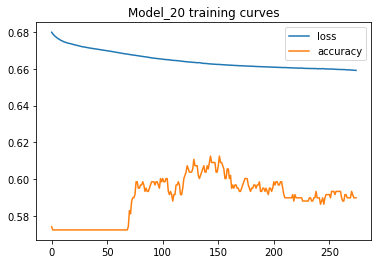

In [226]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_20 training curves")

In [227]:
def getPredictions(x):

  probabilities = model_20.predict(x)

  for i in range(len(probabilities)):
    if probabilities[i] < 0.5:
        probabilities[i] = int(0)
    elif probabilities[i] > 0.5:
        probabilities[i] = int(1)
  return probabilities

y_pred=getPredictions(X_test_4)

In [228]:
con_mat = tf.math.confusion_matrix(labels=y_test_4, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm, index = [0, 1], columns = [0, 1])
con_mat_df

,0,1
0,0.83,0.17
1,0.77,0.23


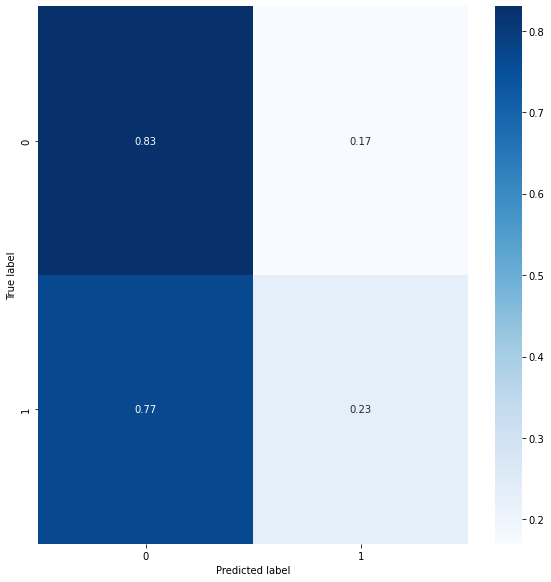

In [229]:
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [230]:
# Print confusion report. 

from sklearn.metrics import classification_report
target_names = ['Negative', 'Positive']
print(classification_report(y_test_4, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Negative       0.63      0.83      0.71       117
    Positive       0.46      0.23      0.30        75

    accuracy                           0.59       192
   macro avg       0.54      0.53      0.51       192
weighted avg       0.56      0.59      0.55       192



In [231]:
# Split data into train and test sets
# 75% of the data for the training set
# 25% of the data for the validation set
from sklearn.model_selection import train_test_split
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_df2, y_df2, test_size=0.25, random_state=42)

In [232]:
# check 75% of features
print(X_train_5, y_train_5)

395    0.114086
132    0.347668
702   -0.362983
691    0.087569
716   -0.294135
         ...   
71    -0.590529
106   -0.496273
270   -0.211310
435   -0.649543
102   -0.017705
Name: feature2, Length: 573, dtype: float64 395    0
132    0
702    1
691    1
716    1
      ..
71     0
106    0
270    0
435    0
102    0
Name: label, Length: 573, dtype: int64


In [233]:
# check 25% - features and lable
print (X_test_5, y_test_5)

357   -0.669628
259   -0.197215
751   -0.240428
193   -0.892116
333   -0.007525
         ...   
73     0.347689
745    0.267441
300    0.453894
145    0.085023
264   -0.268301
Name: feature2, Length: 192, dtype: float64 357    0
259    0
751    1
193    0
333    0
      ..
73     0
745    1
300    0
145    0
264    0
Name: label, Length: 192, dtype: int64


In [234]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_22 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(8, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_22.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001), # learning rate 0.001 
                metrics=['accuracy'])

# Fit the model
history = model_22.fit(X_train_5, y_train_5, epochs=275, batch_size=128)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/275
5/5 [==============================] - 0s 2ms/step - loss: 0.6807 - accuracy: 0.5724
Epoch 2/275
5/5 [==============================] - 0s 3ms/step - loss: 0.6799 - accuracy: 0.5724
Epoch 3/275
5/5 [==============================] - 0s 3ms/step - loss: 0.6793 - accuracy: 0.5724
Epoch 4/275
5/5 [==============================] - 0s 3ms/step - loss: 0.6788 - accuracy: 0.5724
Epoch 5/275
5/5 [==============================] - 0s 3ms/step - loss: 0.6785 - accuracy: 0.5724
Epoch 6/275
5/5 [==============================] - 0s 2ms/step - loss: 0.6782 - accuracy: 0.5724
Epoch 7/275
5/5 [==============================] - 0s 3ms/step - loss: 0.6779 - accuracy: 0.5724
Epoch 8/275
5/5 [==============================] - 0s 3ms/step - loss: 0.6779 - accuracy: 0.5724
Epoch 9/275
5/5 [==============================] - 0s 2ms/step - loss: 0.6776 - accuracy: 0.5724
Epoch 10/275
5/5 [==============================] - 0s 2ms/step - loss: 0.6775 - accuracy: 0.5724
Epoch 11/275
5/5 [===========

In [235]:
model_22.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_58 (Dense)            (None, 4)                 8         
                                                                 
 dense_59 (Dense)            (None, 8)                 40        
                                                                 
 dense_60 (Dense)            (None, 1)                 9         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [236]:
# Evaluate our model on the test set
loss, accuracy = model_22.evaluate(X_test_5, y_test_5)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

6/6 [==============================] - 0s 2ms/step - loss: 0.6620 - accuracy: 0.6094
Model loss on the test set: 0.6619531512260437
Model accuracy on the test set: 60.94%


Text(0.5, 1.0, 'Model_22 training curves')

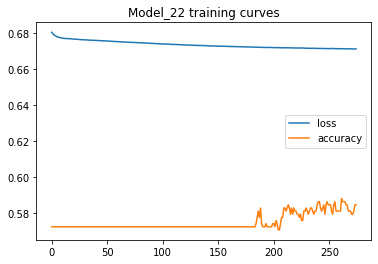

In [237]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_22 training curves")

In [238]:
def getPredictions(x):

  probabilities = model_22.predict(x)

  for i in range(len(probabilities)):
    if probabilities[i] < 0.5:
        probabilities[i] = int(0)
    elif probabilities[i] > 0.5:
        probabilities[i] = int(1)
  return probabilities

y_pred=getPredictions(X_test_5)

In [239]:
con_mat = tf.math.confusion_matrix(labels=y_test_5, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm, index = [0, 1], columns = [0, 1])
con_mat_df

,0,1
0,0.91,0.09
1,0.87,0.13


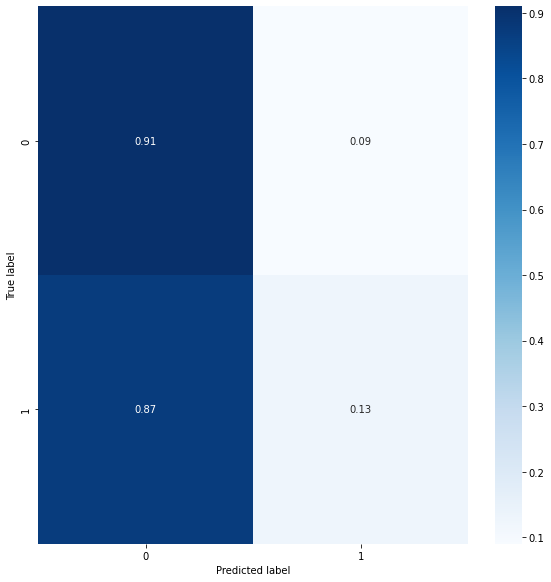

In [240]:
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [241]:
# Print confusion report. 

from sklearn.metrics import classification_report
target_names = ['Negative', 'Positive']
print(classification_report(y_test_5, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Negative       0.62      0.91      0.74       117
    Positive       0.50      0.13      0.21        75

    accuracy                           0.61       192
   macro avg       0.56      0.52      0.48       192
weighted avg       0.57      0.61      0.53       192

